<a href="https://colab.research.google.com/github/Shaik-pardi-11/-Classification-with-Logistic-Regression/blob/main/Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Logistic Regression.

# 1. binary classification dataset

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
df = pd.read_csv("data.csv")

In [39]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [40]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier


df = pd.read_csv("data.csv")
df.drop(columns=["id"], inplace=True)
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 2. Train/test split and standardize features.

In [42]:
import pandas as pd
df = pd.read_csv('data.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [43]:

df = df.drop(columns=['id'])
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [44]:
from sklearn.preprocessing import StandardScaler
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#  3.Fit a Logistic Regression model.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


df = pd.read_csv("data.csv")
df = df.drop(columns=["id"])
df = df.drop(columns=["Unnamed: 32"])

df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [48]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#  4.Evaluate with confusion matrix, precision, reca l, ROC-AUC.

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

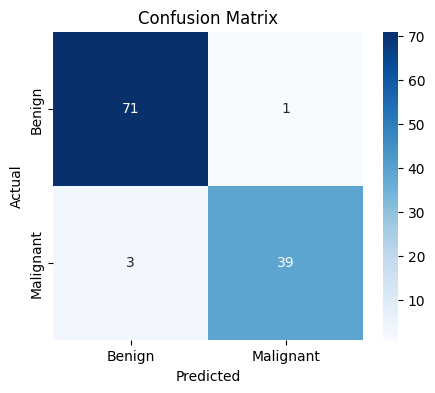

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

ROC-AUC Score: 0.9960


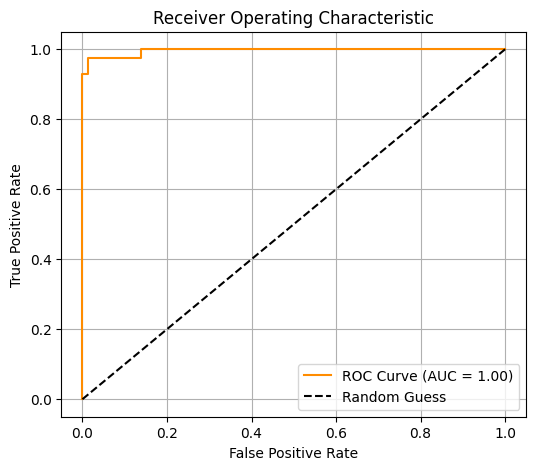

In [53]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  5.Tune threshold and explain sigmoid function.

**Tune threshold**

**Logistic Regression outputs probabilities between 0 and 1 using the sigmoid function (we’ll explain that in a sec). By default, it classifies samples as:
- Class 1 (Malignant) if probability ≥ 0.5
- Class 0 (Benign) if probability < 0.5
But that 0.5 threshold isn't always optimal**

In [54]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

y_proba = model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba >= threshold).astype(int)

precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.9762
Recall: 0.9762


**The Sigmoid Function**

**The sigmoid function transforms the output of a linear model into a probability:The sigmoid function is a type of mathematical function commonly used in machine learning and statistics, especially in logistic regression and neural networks.

Definition
The sigmoid function is defined as:

𝜎
(
𝑥
)
=
1
1
+
𝑒
−
𝑥
σ(x)=
1+e
−x

1
​

Where:

𝑥
x is the input (can be any real number)

𝑒
e is the base of the natural logarithm (approximately 2.718)

Properties
Range:
(
0
,
1
)
(0,1)

Shape: S-shaped (or "sigmoidal")

At
𝑥
=
0
x=0:
𝜎
(
0
)
=
0.5
σ(0)=0.5

As
𝑥
→
∞
x→∞:
𝜎
(
𝑥
)
→
1
σ(x)→1

As
𝑥
→
−
∞
x→−∞:
𝜎
(
𝑥
)
→
0
σ(x)→0
**